In [1]:
import numpy as np
import nca
from matplotlib import pyplot as plt


## Define model

In [68]:
## takes about 2 min
U = 10.
mu = 4.
g = 2.
D = 20.
Gamma = 2 * g**2 / D
beta = 10.
mu_L = -1.
mu_R = 0.5
time_mesh = nca.Mesh(100., int(1e5)).adjoint()

delta_L_less, delta_L_grea = nca.make_Delta_semicirc(Gamma, D, beta, mu_L, time_mesh)
delta_R_less, delta_R_grea = nca.make_Delta_semicirc(Gamma, D, beta, mu_R, time_mesh)

H_loc = np.asarray([0., -mu, -mu, -2*mu + U])

S = nca.SolverSteadyState(2, H_loc, time_mesh, orbital_names=['up', 'dn'])
S.add_bath(0, delta_L_grea + delta_R_grea, delta_L_less + delta_R_less)
S.add_bath(1, delta_L_grea + delta_R_grea, delta_L_less + delta_R_less)

Initial nr of panels: 2
Initial nr of panels: 2
Initial nr of panels: 2
Initial nr of panels: 2


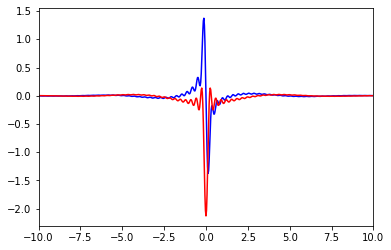

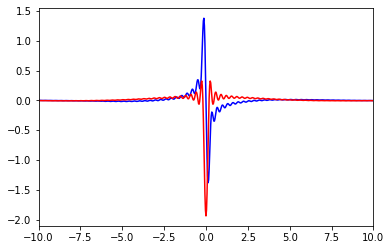

In [69]:
plt.plot(time_mesh, delta_L_grea.real, '-b')
plt.plot(time_mesh, delta_L_grea.imag, '-r')

plt.xlim(-10, 10)
plt.show()

plt.plot(time_mesh, delta_R_grea.real, '-b')
plt.plot(time_mesh, delta_R_grea.imag, '-r')

plt.xlim(-10, 10)
plt.show()

## Run computation

In [70]:
S.greater_loop(max_iter=20, verbose=True)

print("Normalization error:", S.get_normalization_error())
print()

S.lesser_loop(verbose=True)

1 6.653023221438365
2 4.653756488477774
3 0.35409455745492524
4 0.0011514836580293595
5 1.347204142173004e-06
6 5.504113441868356e-10
Done.

Normalization error: [0.00407558 0.0041749  0.0041749  0.00420424]

1 11.431631571396085
2 0.40356737237163154
3 0.024340824402388418
4 0.0006198389447432819
5 9.740549883589227e-06
6 1.1950444454482197e-07
7 1.2938020670684299e-09
Done.



## Get results: R and S

In [71]:
R_grea_w = S.get_R_grea_w()
R_less_w = S.get_R_less_w()

S_grea_w = S.get_S_grea_w()
S_less_w = S.get_S_less_w()

In [72]:
S.state_space.basis

['', 'up', 'dn', 'up,dn']

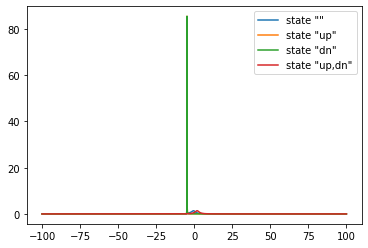

In [73]:
for i in range(4):
    plt.plot(S.freq_mesh, -R_grea_w[:, i], '-', label=f'state "{S.state_space.basis[i]}"')

# plt.xlim(-5, 20)
# plt.semilogy()
plt.legend()

plt.show()

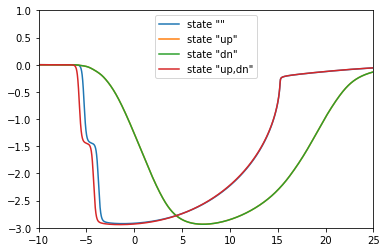

In [74]:

for i in range(4):
    plt.plot(S.freq_mesh, S_grea_w[:, i].real, '-', label=f'state "{S.state_space.basis[i]}"')
    
plt.xlim(-10, 25)
plt.ylim(-3, 1)
plt.legend()

plt.show()

## Get results: Green function

In [75]:
freq_mesh, gf = S.get_G_reta_w(0) # orbital 0 is up

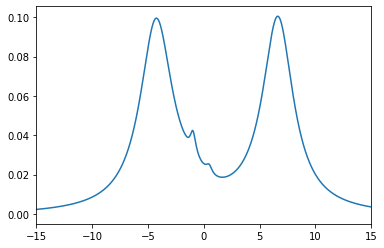

In [76]:
plt.plot(freq_mesh, -gf.imag / np.pi)

plt.xlim(-15, 15)

plt.show()